In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hemasree3366","key":"6f6f782aaf866697abf9b645c43a36ac"}'}

In [ ]:
! pip install  kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c malware-detection

 98% 48.0M/48.9M [00:00<00:00, 153MB/s] 
100% 48.9M/48.9M [00:00<00:00, 94.5MB/s]


In [ ]:
#! unzip Kaggle-data.csv.zip
! unzip /content/malware-detection.zip

Archive:  /content/malware-detection.zip
  inflating: Kaggle-data.csv         
  inflating: data.csv                
  inflating: sample_submission.csv   
  inflating: tek_data.csv            
  inflating: test.csv                
  inflating: test_data.csv           


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Kaggle-data.csv')
df1=df.drop(13) # droping missing value
df1.head()

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,Unnamed: 57
0,1,b69acb3bb133974e48229627663f96d4,332,224,8450,8.0,0,16896,8192,0,...,3.492126,3.492126,3.492126,864.0,864.0,864,72,0,1,NaN
1,2,1cbee4b3725629bd0aa6ac2ff500925f,332,224,258,9.0,0,84480,25600,0,...,3.486827,3.486827,3.486827,892.0,892.0,892,72,0,1,NaN
2,3,b7027cf0cd31c820928950cbfe7e91ef,332,224,8450,8.0,0,4608,3584,0,...,3.517270,3.517270,3.517270,952.0,952.0,952,72,0,1,NaN
3,4,156a0bb069f94d1e7c2508318805f2a4,332,224,8450,10.0,0,108544,15872,0,...,3.270559,3.034188,3.506931,1032.0,972.0,1092,72,0,1,NaN
4,5,c72bf851fed5542abba904b1f3944cd5,332,224,8226,48.0,0,513024,2048,0,...,3.420977,3.420977,3.420977,954.0,954.0,954,0,0,1,NaN


In [ ]:
df1.describe()

,ID,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,Unnamed: 57
count,216351.000000,216351.000000,216351.000000,216351.000000,216351.000000,2.163510e+05,2.163510e+05,2.163510e+05,2.163510e+05,2.163510e+05,...,216351.000000,216351.000000,216351.000000,2.163510e+05,2.163510e+05,2.163510e+05,2.163510e+05,216351.000000,216351.000000,1.0
mean,108176.999940,225.390204,4658.001322,9.052688,4.297983,3.953858e+05,5.827970e+05,1.332431e+06,2.812204e+05,9.263657e+04,...,3.758638,2.391073,5.149374,9.997061e+04,7.139657e+04,2.524543e+05,1.023406e+06,7.888528,0.348979,0.0
std,62455.298486,4.559993,7843.869132,71.522478,11.965309,1.962780e+07,2.841113e+07,7.337826e+07,1.254330e+07,9.922850e+06,...,1.305126,1.042131,1.864466,1.718205e+07,1.681535e+07,2.433619e+07,4.772533e+07,8.049385,0.476648,NaN
min,1.000000,176.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
25%,54089.500000,224.000000,258.000000,7.000000,0.000000,2.560000e+04,1.536000e+04,0.000000e+00,1.253800e+04,4.096000e+03,...,3.362965,2.010229,3.594418,7.755000e+02,3.800000e+01,9.680000e+02,0.000000e+00,0.000000,0.000000,0.0
50%,108177.000000,224.000000,271.000000,9.000000,0.000000,1.018880e+05,1.198080e+05,0.000000e+00,4.661000e+04,4.096000e+03,...,3.671986,2.458492,5.217124,1.601917e+03,4.800000e+01,7.336000e+03,0.000000e+00,0.000000,0.000000,0.0
75%,162264.500000,224.000000,8450.000000,10.000000,0.000000,1.228800e+05,3.850240e+05,0.000000e+00,7.618000e+04,4.096000e+03,...,4.194793,3.003221,6.122045,3.146400e+03,2.320000e+02,1.700500e+04,7.200000e+01,15.000000,1.000000,0.0
max,216352.000000,352.000000,49551.000000,33166.000000,255.000000,4.294967e+09,4.294967e+09,4.294967e+09,4.127916e+09,2.712129e+09,...,143.000000,7.999723,8.000000,4.294903e+09,4.294903e+09,4.294903e+09,4.294967e+09,26.000000,1.000000,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216351 entries, 0 to 216351
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           216351 non-null  int64  
 1   md5                          216351 non-null  object 
 2   Machine                      216351 non-null  object 
 3   SizeOfOptionalHeader         216351 non-null  int64  
 4   Characteristics              216351 non-null  int64  
 5   MajorLinkerVersion           216351 non-null  float64
 6   MinorLinkerVersion           216351 non-null  int64  
 7   SizeOfCode                   216351 non-null  int64  
 8   SizeOfInitializedData        216351 non-null  int64  
 9   SizeOfUninitializedData      216351 non-null  int64  
 10  AddressOfEntryPoint          216351 non-null  int64  
 11  BaseOfCode                   216351 non-null  int64  
 12  BaseOfData                   216351 non-null  int64  
 13 

In [ ]:
df1.isnull().sum()

ID                                  0
md5                                 0
Machine                             0
SizeOfOptionalHeader                0
Characteristics                     0
MajorLinkerVersion                  0
MinorLinkerVersion                  0
SizeOfCode                          0
SizeOfInitializedData               0
SizeOfUninitializedData             0
AddressOfEntryPoint                 0
BaseOfCode                          0
BaseOfData                          0
ImageBase                           0
SectionAlignment                    0
FileAlignment                       0
MajorOperatingSystemVersion         0
MinorOperatingSystemVersion         0
MajorImageVersion                   0
MinorImageVersion                   0
MajorSubsystemVersion               0
MinorSubsystemVersion               0
SizeOfImage                         0
SizeOfHeaders                       0
CheckSum                            0
Subsystem                           0
DllCharacter

In [ ]:
df1["legitimate"].head()

0    1
1    1
2    1
3    1
4    1
Name: legitimate, dtype: int64

In [ ]:
# df=df.dropna()
y=df1['legitimate']
df1=df1.drop(columns=['Unnamed: 57','legitimate'])
df1.sample(5)

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
63848,63849,82e6465b8658a8fb39d1806def2322a9,332,224,271,6.0,0,348160,180224,0,...,0,16,3.786348,2.866686,6.249182,9196.375000,90.0,66042,0,0
23693,23694,e1ab2ac4a4d50b479df1b1cea4a7409b,332,224,8450,8.0,0,0,12800,0,...,0,9,4.080919,2.669314,5.608044,1315.444444,90.0,4264,0,0
8637,8638,f784f4a774c065c4d01a9e4a4ac75e79,332,224,8454,2.0,22,36352,56320,4096,...,16,1,3.413476,3.413476,3.413476,1024.000000,1024.0,1024,0,0
120320,120321,b53caaf1316fdc9cb903326690026665,332,224,258,11.0,0,113664,682496,0,...,0,7,4.453368,2.623078,7.967002,80992.857143,62.0,534528,0,0
186099,186100,ee063eb338b4b4913e17251537abf46b,332,224,258,9.0,0,717824,585728,0,...,0,226,3.559983,1.373442,7.691313,844.800885,20.0,14000,72,15


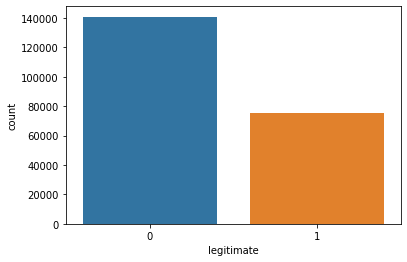

In [ ]:
sns.countplot(y)

In [ ]:
df1.dtypes

ID                               int64
md5                             object
Machine                         object
SizeOfOptionalHeader             int64
Characteristics                  int64
MajorLinkerVersion             float64
MinorLinkerVersion               int64
SizeOfCode                       int64
SizeOfInitializedData            int64
SizeOfUninitializedData          int64
AddressOfEntryPoint              int64
BaseOfCode                       int64
BaseOfData                       int64
ImageBase                      float64
SectionAlignment                 int64
FileAlignment                    int64
MajorOperatingSystemVersion      int64
MinorOperatingSystemVersion      int64
MajorImageVersion                int64
MinorImageVersion                int64
MajorSubsystemVersion            int64
MinorSubsystemVersion            int64
SizeOfImage                      int64
SizeOfHeaders                    int64
CheckSum                         int64
Subsystem                

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
object_cols=df1.select_dtypes(include='object').columns
for i in object_cols:
  df1[i]=encoder.fit_transform(df1[i].astype(str))

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216351 entries, 0 to 216351
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           216351 non-null  int64  
 1   md5                          216351 non-null  int64  
 2   Machine                      216351 non-null  int64  
 3   SizeOfOptionalHeader         216351 non-null  int64  
 4   Characteristics              216351 non-null  int64  
 5   MajorLinkerVersion           216351 non-null  float64
 6   MinorLinkerVersion           216351 non-null  int64  
 7   SizeOfCode                   216351 non-null  int64  
 8   SizeOfInitializedData        216351 non-null  int64  
 9   SizeOfUninitializedData      216351 non-null  int64  
 10  AddressOfEntryPoint          216351 non-null  int64  
 11  BaseOfCode                   216351 non-null  int64  
 12  BaseOfData                   216351 non-null  int64  
 13 

In [ ]:
df1.sample(5)

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
34774,34775,99042,0,224,259,9.0,0,177152,3584,0,...,0,3,2.464596,1.672933,3.829977,573.666667,11.0,1318,0,0
174580,174581,153542,0,224,258,10.0,0,120320,385024,0,...,0,6,3.756068,2.458492,5.317552,2739.500000,48.0,9640,72,15
213071,213072,78106,0,224,258,8.0,0,7680,320512,0,...,0,6,4.059239,2.149070,5.155409,3020.833333,48.0,9640,0,23
41830,41831,118332,0,224,271,7.0,10,9728,1536,0,...,0,1,3.570930,3.570930,3.570930,884.000000,884.0,884,72,0
12425,12426,38389,0,224,8450,9.0,0,33792,331776,0,...,13,2,4.221888,3.559428,4.884347,158878.000000,940.0,316816,72,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
cols=df1.columns
data_scaled=scaler.fit_transform(df1.values)
df_scaled=pd.DataFrame(data=data_scaled,columns=cols)

df_scaled.sample(5)

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
177571,0.820759,0.986753,0.000000,0.272727,0.005227,0.000271,0.0,0.000023,0.000268,0.000000,...,0.000000,0.003043,0.033385,0.224857,0.993045,1.014850e-05,3.725346e-09,1.952678e-04,1.676381e-08,0.000000
162070,0.749111,0.215811,0.000000,0.272727,0.005207,0.000302,0.0,0.000007,0.000104,0.000004,...,0.000000,0.000974,0.021601,0.246425,0.649797,8.984488e-08,7.916361e-09,1.732286e-07,0.000000e+00,0.500000
143924,0.665238,0.911144,0.000000,0.272727,0.005227,0.000271,0.0,0.000036,0.000041,0.000000,...,0.000000,0.002678,0.023901,0.330732,0.653490,1.704769e-07,1.443572e-08,6.980368e-07,1.676381e-08,0.000000
64210,0.296791,0.123391,0.000000,0.272727,0.005207,0.000302,0.0,0.000007,0.000104,0.000004,...,0.000000,0.000730,0.022046,0.270130,0.652141,9.189188e-08,4.656683e-09,2.253835e-07,0.000000e+00,0.000000
110335,0.509986,0.480325,0.142857,0.363636,0.228008,0.000271,0.0,0.000096,0.000044,0.000000,...,0.000208,0.001582,0.022093,0.218458,0.513818,2.627444e-07,1.536705e-08,8.707997e-07,0.000000e+00,0.615385


Text(0.5, 1.0, 'Correlation between variables')

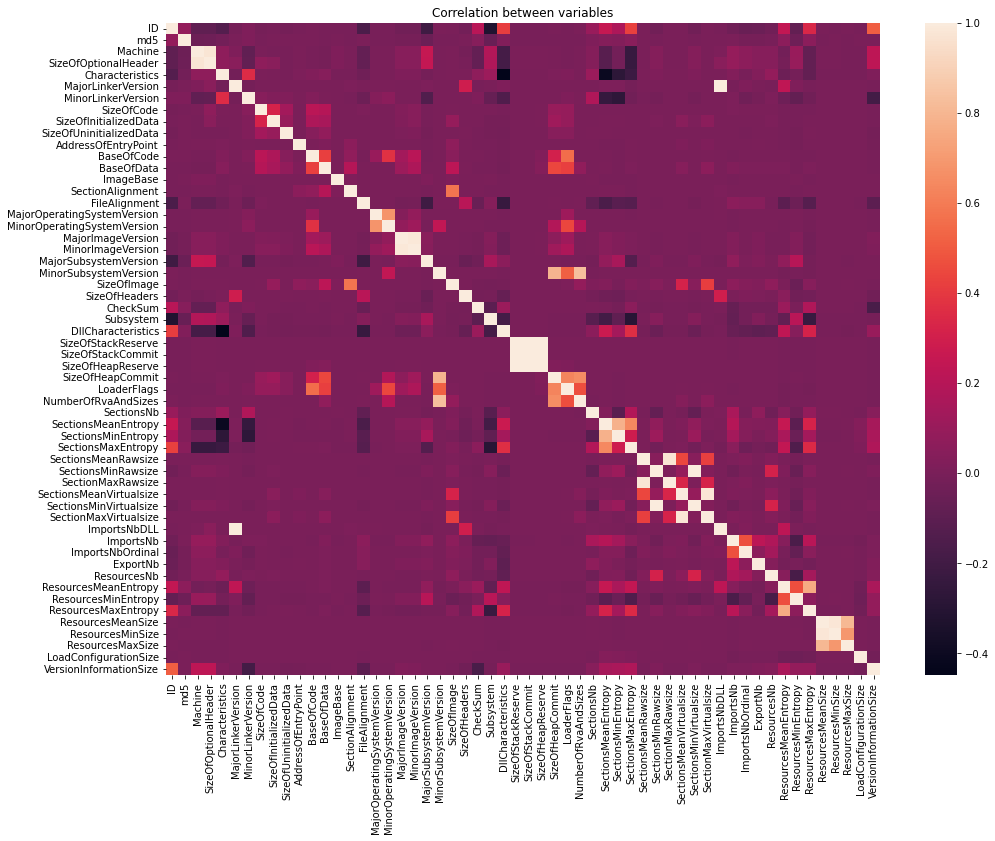

In [ ]:
fig=plt.figure(figsize=(16,12))
sns.heatmap(df1.corr())
plt.title('Correlation between variables')

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_scaled,y,test_size=0.25,random_state=42,stratify=y)
print(f'X_trains shape is {X_train.shape}, y_train shape is {y_train.shape}')

X_trains shape is (162263, 56), y_train shape is (162263,)


Confusion Matrix 


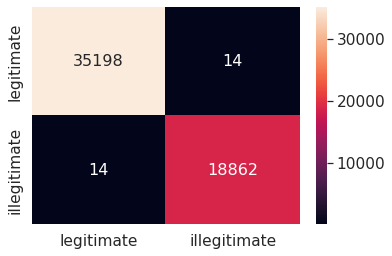

Random Forest classifier accuracy is : 0.9994823250998373
Total runtime of the program is 47.840538024902344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35212
           1       1.00      1.00      1.00     18876

    accuracy                           1.00     54088
   macro avg       1.00      1.00      1.00     54088
weighted avg       1.00      1.00      1.00     54088



In [ ]:
import time
begin = time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_acc=rf.score(X_test,y_test)

y_rf_pred=rf.predict(X_test)
time.sleep(1)
end = time.time()
time_rf=end - begin
print('Confusion Matrix ')
arr=(confusion_matrix(y_test,y_rf_pred))
# print(arr)
df_rf = pd.DataFrame(arr, ['legitimate','illegitimate'], ['legitimate','illegitimate'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_rf, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Random Forest classifier accuracy is :',rf_acc)
print(f"Total runtime of the program is {time_rf}")
print(classification_report(y_test,y_rf_pred))

Confusion Matrix 


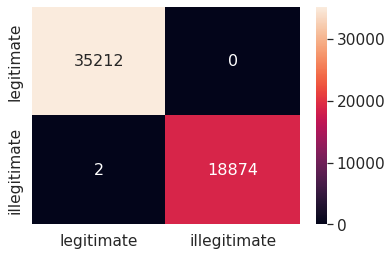

Gradient boosting classifier accuracy is : 0.999963023221417
Total runtime of the program is 116.7361695766449
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35212
           1       1.00      1.00      1.00     18876

    accuracy                           1.00     54088
   macro avg       1.00      1.00      1.00     54088
weighted avg       1.00      1.00      1.00     54088



In [ ]:
import time
begin = time.time()
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gb=GradientBoostingClassifier()

gb.fit(X_train,y_train)
gb_acc=gb.score(X_test,y_test)

y_gb_pred=gb.predict(X_test)
time.sleep(1)
end = time.time()
time_gbc=end - begin
print('Confusion Matrix ')
arr1=(confusion_matrix(y_test,y_gb_pred))
# print(arr)
df_gb = pd.DataFrame(arr1, ['legitimate','illegitimate'], ['legitimate','illegitimate'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_gb, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Gradient boosting classifier accuracy is :',gb_acc)
print(f"Total runtime of the program is {time_gbc}")
print(classification_report(y_test,y_gb_pred))

Confusion Matrix 


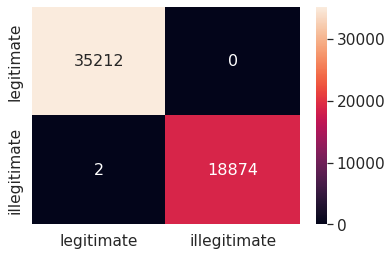

XGBoost classifier accuracy is : 0.999963023221417
Total runtime of the program is 33.641090393066406
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35212
           1       1.00      1.00      1.00     18876

    accuracy                           1.00     54088
   macro avg       1.00      1.00      1.00     54088
weighted avg       1.00      1.00      1.00     54088



In [ ]:
import time
begin = time.time()
import xgboost as xgb
from sklearn.metrics import classification_report
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_acc=xgb_clf.score(X_test,y_test)

y_xgb_pred=xgb_clf.predict(X_test)
time.sleep(1)
end = time.time()
time_xgb=end - begin
print('Confusion Matrix ')
arr2=(confusion_matrix(y_test,y_xgb_pred))
# print(arr)
df_xgb = pd.DataFrame(arr2, ['legitimate','illegitimate'], ['legitimate','illegitimate'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_xgb, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('XGBoost classifier accuracy is :',xgb_acc)
print(f"Total runtime of the program is {time_xgb}")
print(classification_report(y_test,y_xgb_pred))

Confusion Matrix 


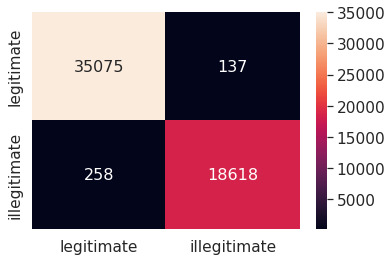

SVM accuracy is : 0.9926970862298476
Total runtime of the program is 278.28803515434265
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35212
           1       0.99      0.99      0.99     18876

    accuracy                           0.99     54088
   macro avg       0.99      0.99      0.99     54088
weighted avg       0.99      0.99      0.99     54088



In [ ]:
import time
begin = time.time()
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svc=SVC()
svc.fit(X_train,y_train)
svm_acc=svc.score(X_test,y_test)
y_svm_pred=svc.predict(X_test)
time.sleep(1)
end_svm = time.time()
time_svm=end_svm - begin
print('Confusion Matrix ')

arr4=(confusion_matrix(y_test,y_svm_pred))
# print(arr)
df_svm = pd.DataFrame(arr4, ['legitimate','illegitimate'], ['legitimate','illegitimate'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_svm, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('SVM accuracy is :',svm_acc)
print(f"Total runtime of the program is {time_svm}")
print(classification_report(y_test,y_svm_pred))

Confusion Matrix 


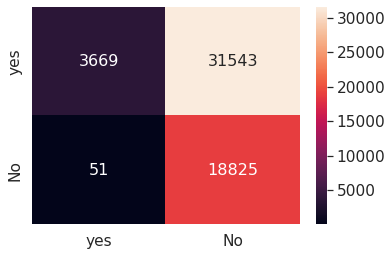

Naive Bayes Classifier Accuracy : 0.4158778287235616
Total runtime of the program is 1.2509160041809082
              precision    recall  f1-score   support

           0       0.99      0.10      0.19     35212
           1       0.37      1.00      0.54     18876

    accuracy                           0.42     54088
   macro avg       0.68      0.55      0.37     54088
weighted avg       0.77      0.42      0.31     54088



In [ ]:
import time
begin = time.time()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
NB=GaussianNB()
NB.fit(X_train,y_train)
nb_acc=NB.score(X_test,y_test)
y_nb_pred=NB.predict(X_test)
time.sleep(1)
end_nb = time.time()
time_nb=end_nb - begin
print('Confusion Matrix ')
arr5=(confusion_matrix(y_test,y_nb_pred))
# print(arr)
# print(type(arr))
# arr=arr.astype('float64')
df_nb = pd.DataFrame(arr5, ['yes','No'], ['yes','No'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_nb, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Naive Bayes Classifier Accuracy :',nb_acc)
print(f"Total runtime of the program is {time_nb}")
print(classification_report(y_test,y_nb_pred))

Confusion Matrix 


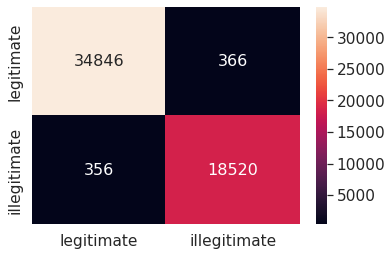

Logistic Regression accuracy is : 0.986651382931519
Total runtime of the program is 4.535335302352905
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35212
           1       0.98      0.98      0.98     18876

    accuracy                           0.99     54088
   macro avg       0.99      0.99      0.99     54088
weighted avg       0.99      0.99      0.99     54088



In [ ]:
begin = time.time()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_acc=lr.score(X_test,y_test)

y_lr_pred=lr.predict(X_test)
time.sleep(1)
end = time.time()
time_lr=end - begin
print('Confusion Matrix ')
arr=(confusion_matrix(y_test,y_lr_pred))
# print(arr)
df_lr = pd.DataFrame(arr, ['legitimate','illegitimate'], ['legitimate','illegitimate'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_lr, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Logistic Regression accuracy is :',lr_acc)
print(f"Total runtime of the program is {time_lr}")
print(classification_report(y_test,y_lr_pred))

Confusion Matrix 


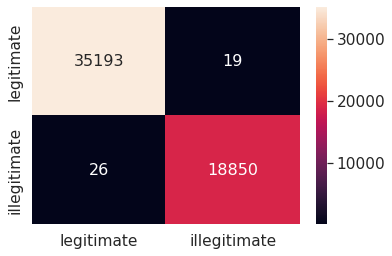

Decision Tree classifier accuracy is : 0.9991680224818814
Total runtime of the program is 5.276320219039917
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35212
           1       1.00      1.00      1.00     18876

    accuracy                           1.00     54088
   macro avg       1.00      1.00      1.00     54088
weighted avg       1.00      1.00      1.00     54088



In [ ]:
import time
begin = time.time()
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dct=DecisionTreeClassifier()
dct.fit(X_train,y_train)
dct_acc=dct.score(X_test,y_test)

y_dct_pred=dct.predict(X_test)
time.sleep(1)
end = time.time()
time_dct=end - begin
print('Confusion Matrix ')
arr=(confusion_matrix(y_test,y_dct_pred))
# print(arr)
df_dct = pd.DataFrame(arr, ['legitimate','illegitimate'], ['legitimate','illegitimate'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_dct, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Decision Tree classifier accuracy is :',dct_acc)
print(f"Total runtime of the program is {time_dct}")
print(classification_report(y_test,y_dct_pred))

Text(0, 0.5, 'Accuracy')

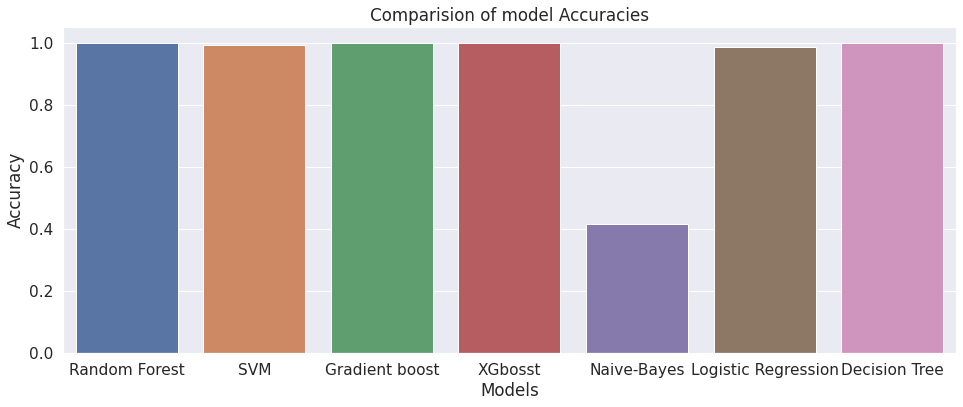

In [ ]:
res=pd.DataFrame(data=[[rf_acc,svm_acc,gb_acc,xgb_acc,nb_acc,lr_acc,dct_acc]],columns=['Random Forest','SVM','Gradient boost','XGbosst','Naive-Bayes','Logistic Regression','Decision Tree'])
fig=plt.figure(figsize=(16,6))
sns.barplot(data=res)
plt.title('Comparision of model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Time Taken(in sec)')

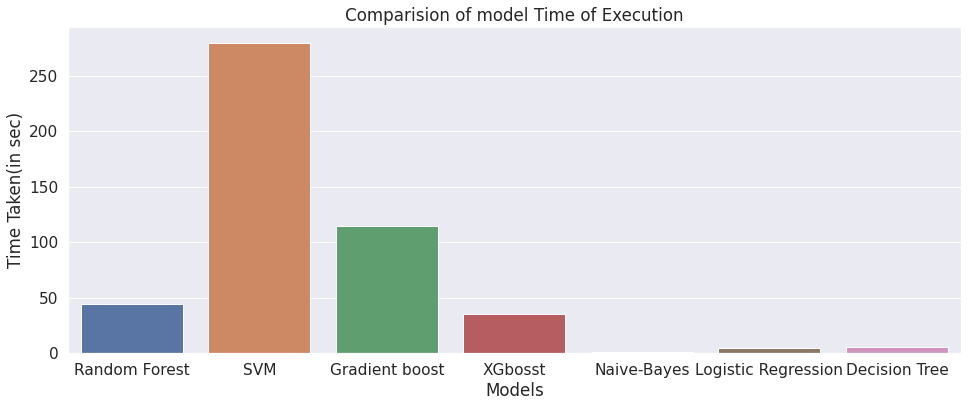

In [ ]:
res=pd.DataFrame(data=[[time_rf,time_svm,time_gbc,time_xgb,time_nb,time_lr,time_dct]],columns=['Random Forest','SVM','Gradient boost','XGbosst','Naive-Bayes','Logistic Regression','Decision Tree' ])
fig=plt.figure(figsize=(16,6))
sns.barplot(data=res)
plt.title('Comparision of model Time of Execution')
plt.xlabel('Models')
plt.ylabel('Time Taken(in sec)')